<div style=" background-color: rgb(43, 197, 37);" >
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Data & tests statistiques
</h2>
</div>

In [66]:
import pandas as pd
import numpy as np
from matplotlib import image
import matplotlib.pyplot as plt 
import seaborn as sns

np.set_printoptions(precision=2)

import scipy.stats as stats
from scipy.stats import ttest_1samp
from scipy.stats import f_oneway
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from scipy.stats import kstest

In [67]:
df_stat = pd.read_csv('../Source/Data_processed/lapage_all.csv', sep=';', index_col=['Timestamp'] , parse_dates=True)

In [68]:
df_stat['categ'] = df_stat['categ'].astype(str)
df_stat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 687534 entries, 2021-03-01 00:01:07.843138 to 2023-02-28 23:58:30.792755
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     687534 non-null  object 
 1   session_id  687534 non-null  object 
 2   client_id   687534 non-null  object 
 3   sex         687534 non-null  object 
 4   birth       687534 non-null  int64  
 5   price       687534 non-null  float64
 6   categ       687534 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 42.0+ MB


In [69]:
df_stat

,id_prod,session_id,client_id,sex,birth,price,categ
Timestamp,,,,,,,
2021-03-01 00:01:07.843138,0_1259,s_1,c_329,f,1967,11.99,0
2021-03-01 00:02:26.047414,0_1390,s_2,c_664,m,1960,19.37,0
2021-03-01 00:02:38.311413,0_1352,s_3,c_580,m,1988,4.50,0
2021-03-01 00:04:54.559692,0_1458,s_4,c_7912,f,1989,6.55,0
2021-03-01 00:05:18.801198,0_1358,s_5,c_2033,f,1956,16.49,0
...,...,...,...,...,...,...,...
2023-02-28 23:49:03.148402,1_508,s_348444,c_3573,f,1996,21.92,1
2023-02-28 23:51:29.318531,2_37,s_348445,c_50,f,1994,48.99,2
2023-02-28 23:53:18.929676,1_695,s_348446,c_488,f,1985,26.99,1


#### Mes données sont-elles numériques (quantitatives) ou catégoriques (qualitatives) ?
- J'ai 2 variables quantitative et 5 variables catégoriques
#### Ecrire toutes les questions que je me pose

#### Quel est le nombre de groupes ou de variables que je compare ?

#### Quel est l'objectif de mon étude ? Que cherche-je à déterminer ou à comparer ?

<div style=" background-color: rgb(343, 197, 37);" >
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center"> Partie 1 - Test de normalité des données
</h2>
</div>

---
### 1.1 Choisir la variable à tester (variable quanti) -> Prix
---

In [70]:
df_stat['price'].head(2)

Timestamp
2021-03-01 00:01:07.843138    11.99
2021-03-01 00:02:26.047414    19.37
Name: price, dtype: float64

---
### 1.1 bis - Est-ce que la variable prix suit une distribution normal ? Hypothèses :
----

#### H0 : la variable prix suit une loi normal p > 0,05
#### H1 : la variable prix ne suit pas une loi normal p < 0,05


---
### 1.2 - Décrire la variable (moyenne , écart-type (std) , variance (var) 
---

In [71]:
print(f"la moyenne (x barre) théorique est {round(df_stat['price'].mean(), 2)}")
print(f"l'écart type ou stand.dev. (sigma) théorique est {round(df_stat['price'].std(), 2)}")
print(f"la variance (sigma carré) théorique est de {round(df_stat['price'].var(), 2)}")

la moyenne (x barre) théorique est 17.49
l'écart type ou stand.dev. (sigma) théorique est 18.24
la variance (sigma carré) théorique est de 332.64


---
### 1.3 - Détérminer un échantillon (mathématiquement)
---

In [72]:
## Fixation de la taille de l'échantillon       
import math

# Paramètres
marge_erreur = 1
niveau_confiance = 0.95
ecart_type_estime = 18.24  # Écart-type estimé des prix dans votre dataset

# Z-score pour un niveau de confiance de 95%
z_score = 1.96  # Pour un niveau de confiance de 95%

# Taille de l'échantillon
taille_echantillon = (z_score * ecart_type_estime / marge_erreur) ** 2
taille_echantillon = math.ceil(taille_echantillon)  # Arrondir à l'entier supérieur

display("Taille d'échantillon nécessaire :", taille_echantillon)


"Taille d'échantillon nécessaire :"

1279

---
### 1.4 - Stratifié l'échantillon pour fiabiliser la représentativité des données
---

- le sexe (650 hommes et 650 femmes)

In [81]:
from sklearn.model_selection import StratifiedShuffleSplit

taille_echantillon = 1300 #je fixe la taille de l'échantillon à 1300

sss = StratifiedShuffleSplit(n_splits=1, test_size=taille_echantillon, random_state=9000) #j'initialise l'objet StratifiedShuffleSplit pour générer un échantillon stratifié de 1300 individus

for train_index, test_index in sss.split(df_stat, df_stat['sex']): #je génère l'échantillon stratifié selon la variable sex
    echantillon_stratifie = df_stat.iloc[test_index] #je récupère l'échantillon stratifié
    
print(echantillon_stratifie.head(1)) #j'affiche la premières lignes de l'échantillon stratifié
display("-----------------------------")
print(echantillon_stratifie['sex'].value_counts()) #je vérifie

                           id_prod session_id client_id sex  birth  price  \
Timestamp                                                                   
2022-10-11 08:04:51.518235   1_431   s_280852    c_6497   m   1959  27.99   

                           categ  
Timestamp                         
2022-10-11 08:04:51.518235     1  


'-----------------------------'

sex
m    652
f    648
Name: count, dtype: int64


---
### 1.5 - Appliquer le test de Kosmogorov-Smirnov
---

In [82]:
mean_prix =echantillon_stratifie['price'].mean() #je calcule la moyenne des prix dans l'échantillon stratifié
std_prix = echantillon_stratifie['price'].std() #je calcule l'écart-type des prix dans l'échantillon stratifié
display(round(mean_prix, 2))
display(round(std_prix, 2))
display("-----------------------------")

stat, p_value = kstest(echantillon_stratifie['price'], 'norm', args=(mean_prix, std_prix)) #je teste la normalité de la distribution des prix dans l'échantillon stratifié

display("-----------------------------")

print("Statistique de test KS:", round(stat, 5))
print("Valeur p:", np.format_float_positional(p_value, precision=78))

display("-----------------------------")

if p_value > 0.05:
    print("La distribution des prix est normale -> l'hypothèse nulle H0 n'est pas rejetée")
else:
    print("La distribution des prix n'est pas normale -> l'hypothèse nulle H0 est rejetée")
    

17.77

19.94

'-----------------------------'

'-----------------------------'

Statistique de test KS: 0.2434
Valeur p: 0.000000000000000000000000000000000000000000000000000000000000000000027119359957


'-----------------------------'

La distribution des prix n'est pas normale -> l'hypothèse nulle H0 est rejetée


---
### 1.6 - On retiens l'hypothèse alternative H1
---


<div style=" background-color: rgb(343, 197, 37);" >
<h2 style="padding: 10px; color: white; text-align: center" > Representation graphique
</h2>
</div>

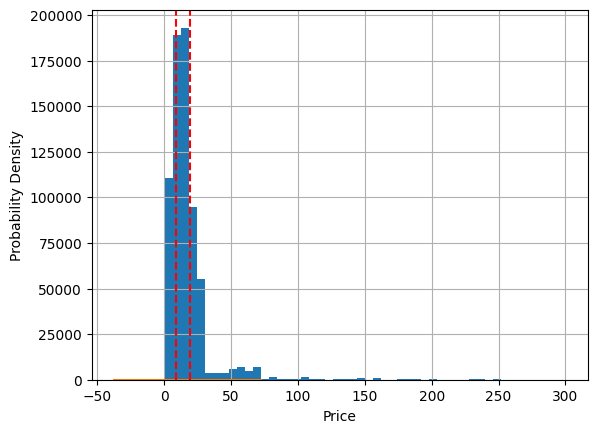

In [46]:
df_stat['price'].hist(bins=50)

# Generate data for the normal distribution
mu = df_stat['price'].mean()
sigma = df_stat['price'].std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

# Plot the normal distribution curve
plt.plot(x, y)
plt.axvline(x=np.percentile(df_stat['price'], 25), color='r', linestyle='--')
plt.axvline(x=np.percentile(df_stat['price'], 75), color='r', linestyle='--')
plt.xlabel('Price')
plt.ylabel('Probability Density')
plt.show()

----
## Test de normalité sur une variable : année de naissance
---

In [49]:
# choix de la variable à étudier : année de naissance
df_stat['birth'].head(2)   

Timestamp
2021-03-01 00:01:07.843138    1967
2021-03-01 00:02:26.047414    1960
Name: birth, dtype: int64

In [50]:
print(f"la moyenne (x barre) empirique est {round(df_stat['birth'].mean(), 2)}")
print(f"l'écart type ou stand.dev. (sigma) empirique est {round(df_stat['birth'].std(), 2)}")
print(f"la variance est de {round(df_stat['birth'].var(), 2)}")

la moyenne (x barre) empirique est 1977.82
l'écart type ou stand.dev. (sigma) empirique est 13.61
la variance est de 185.18
